In [240]:
# importing pandas for reading datasets , matplotlib for visualizing data , glob for reading all filenames and numpy for math functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [241]:
# normalization function to scale data between 0 and 1
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [206]:
#reading all files from the os
all_files=glob.glob("*.csv")
list_of_dataframes=[]
list_of_axis=[]
#reading the dataframes
for file_name in all_files:
    df=pd.read_csv(file_name)
    list_of_dataframes.append(NormalizeData(df))
#cleaning data
for x in range (0,28):
    if x<24:
        list_of_dataframes[x].drop(list_of_dataframes[x].columns[[0,1]],1,inplace=True)
    else:
        list_of_dataframes[x].drop(list_of_dataframes[x].columns[0],1,inplace=True)

In [207]:
#create lists of labels and colors for each data_frame
list_of_labels=[]
list_of_colors=[]
colors=["red","orange","blue"]
for df in list_of_dataframes:
    temp=list(df.columns)
    df_colors=colors[:len(df.columns)]
    list_of_colors.append(df_colors)
    list_of_labels.append(temp)

In [316]:
def visualize_data(dataframez,labelz,colorz,filenamez):
    fig, axs = plt.subplots(nrows=14, ncols=2,figsize=(32,48),gridspec_kw={'hspace': .4})
    row=0
    col=0
    for i in range (0,len(dataframez)):
        lists=[]
        for j in range (0,len(labelz[i])):
            lists.append(dataframez[i][labelz[i][j]])
        if len(labelz[i])<2:
            axs[row][col].hist(lists, bins=5, histtype='bar',color=list_of_colors[i],label=list_of_labels[i]) 
        else:
            axs[row][col].hist(lists, bins=5, density=True, histtype='bar', stacked=True,color=colorz[i],label=labelz[i])
        axs[row][col].set_title(filenamez[i])
        axs[row][col].set(xlabel='seeds', ylabel='frequency')
        axs[row][col].legend()
        #this couple of lines is used to save the subplot as png , it is enough to run it once
        #extent = axs[row][col].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        #fig.savefig(filenamez[i]+'figure.png', bbox_inches=extent.expanded(1.2, 1.2))
        col=col+1
        if col%2==0 and col != 0:
            row+=1
            col=0
        
    plt.show()
    
            

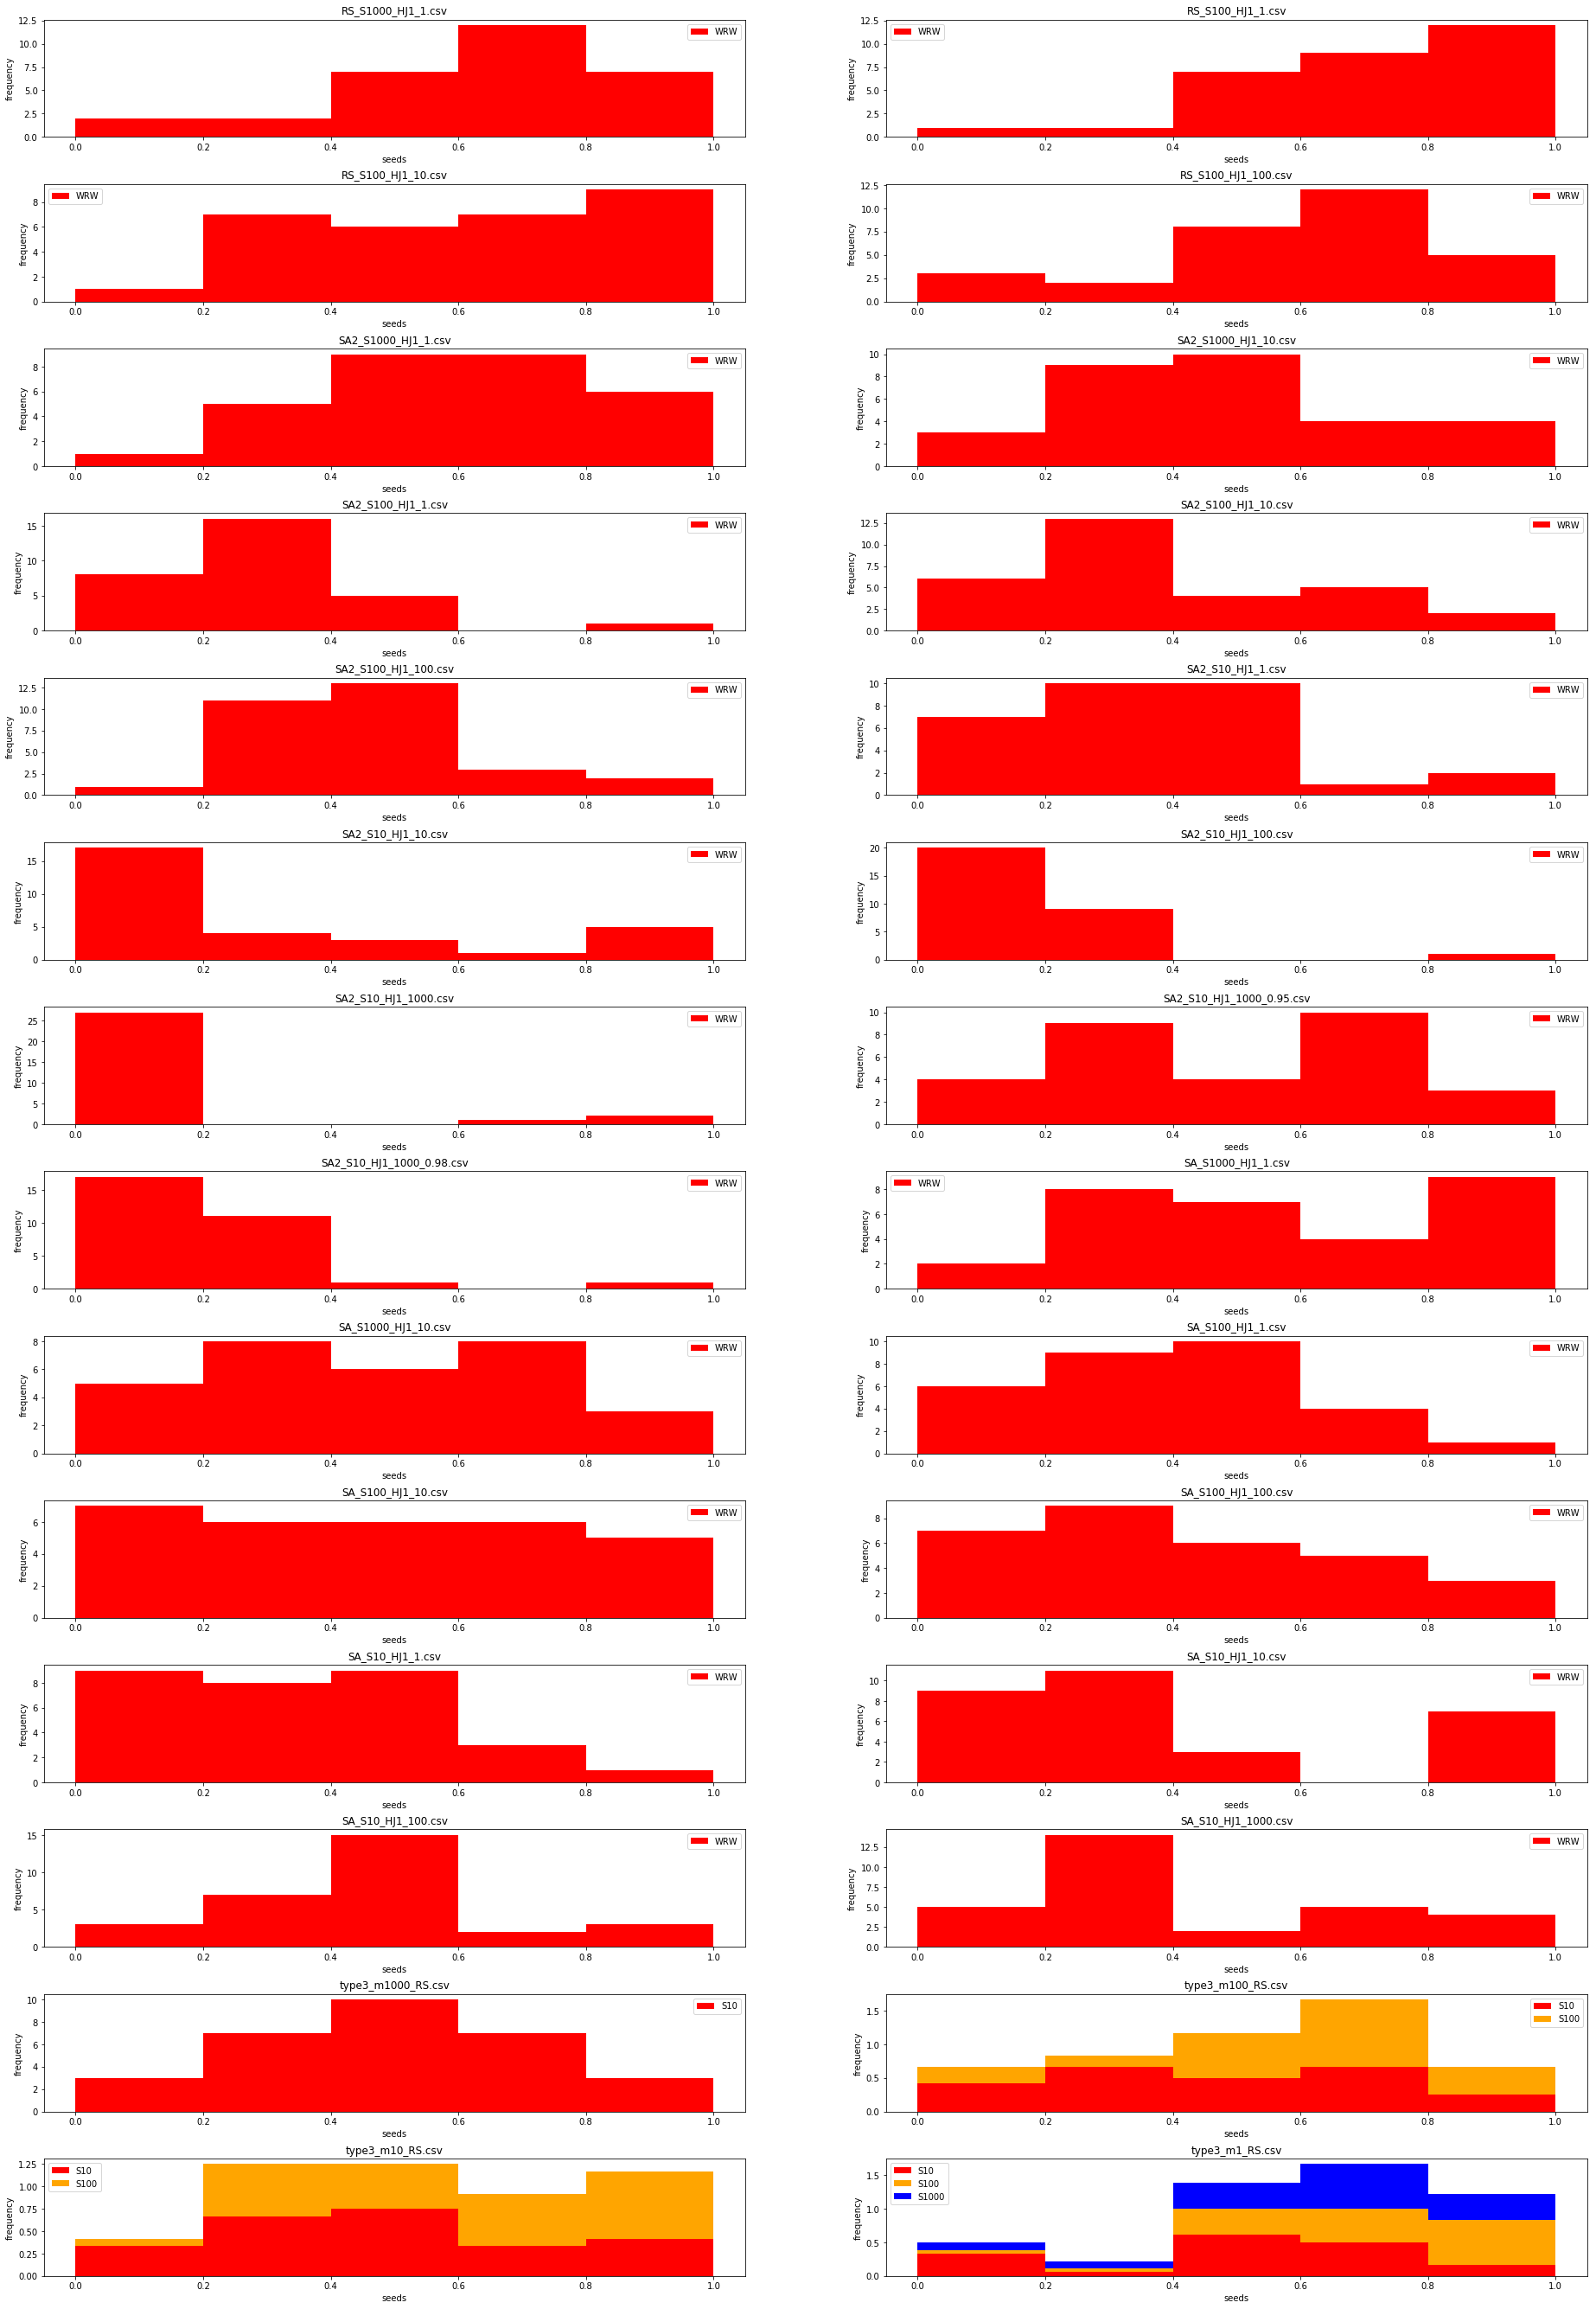

In [317]:
visualize_data(list_of_dataframes,list_of_labels,list_of_colors,all_files)